#### 0.0 Simulate phone dataset 
##### a) Use numpy.random.normal() to simulate a dataset with the following requirements:
###### Detta simulerar 400 x-värden från en normalfördelning med medelvärdet 100 och standardavvikelsen 100. Därefter tas absolutvärdet av dessa x-värden. Sedan simuleras 400 brusvärden från en normalfördelning med medelvärdet 0 och standardavvikelsen 50. Slutligen beräknas y-värdena enligt formeln y = 2x + 25 + brus. Datamängden plottas sedan med x-värdena på x-axeln och y-värdena på y-axeln.

Number of points x ≥ 300 min: 11
Number of points y < 0 kr: 8


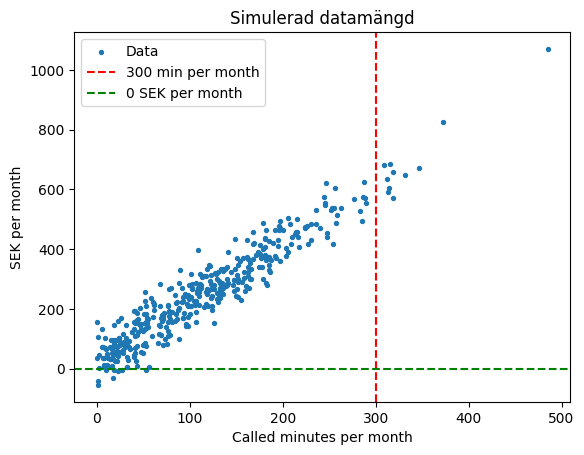

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#sätt seed för reproducerbarhet
np.random.seed(42)

# simulerar 400 x-värden från en normalfördelning med mededlvärdet 100 och standardavvikelsen 100
x = np.random.normal(loc=100, scale=100, size=400)

# Ta absolutvärdet av x-värdena
x_abs = np.abs(x)

# Simulerar 400 brusvärden från en normalfördelning med medelvärdet 0 och standardavvikelsen 50
noise = np.random.normal(loc=0, scale=50, size=400)

# Låt y = 2x + 25 + brus(€)
y = 2 * x_abs + 25 + noise

# Beräkning av värden som är under eller lika med 300 och över 0
print("Number of points x ≥ 300 min:", np.sum(x_abs >= 300))
print("Number of points y < 0 kr:", np.sum(y < 0))

# Plottar datamängden
plt.scatter(x_abs, y, s=8, label="Data")
plt.axvline(x=300, color='red', linestyle='--', label="300 min per month")
plt.axhline(y=0, color='green', linestyle='--', label="0 SEK per month")
plt.xlabel("Called minutes per month")
plt.ylabel("SEK per month")
plt.title("Simulerad datamängd")
plt.legend()
plt.show()



##### 0.0 b) Now we want to remove some outliers according to this assumption:

Length of x, outliers removed: 381
Length of y, outliers removed: 381


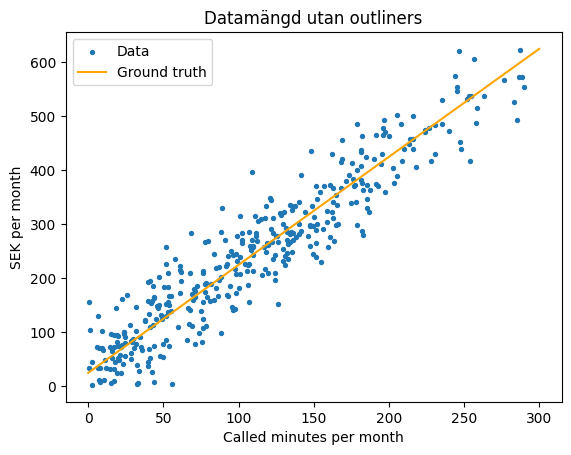

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Ta bort outliers
filter = (x_abs <= 300)&(y >= 0)
x_abs = x_abs[filter]
y = y[filter]

print("Length of x, outliers removed:", len(x_abs))
print("Length of y, outliers removed:", len(y))

# Plotta den nya datamängden
plt.scatter(x_abs, y, s=8, label="Data")
plt.xlabel("Called minutes per month")
plt.ylabel("SEK per month")
plt.title("Datamängd utan outliners")

# Plotta ground truth med de sanna parametrarna
x_true = np.linspace(0, 300, 100)
y_true = 25 + 2 * x_true
plt.plot(x_true, y_true, color="orange", label="Ground truth")
plt.legend()
plt.show()


#### 0.0 c) Insert the values into a DataFrame

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
